In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import glob
from tabulate import tabulate
from datetime import date
import pandas as pd
from os import walk
import peakutils
from peakutils.plot import plot as pplot
from IPython.display import display, clear_output
sys.path.append('/media/labfiles/ruco/repos/lflm-labs-data/src/')
from labexp import experiments
from plots import adata,rbackline,rbdata, join_labels
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker

plt.style.use('/media/labfiles/lab-codes/plot-styles/plotstyle.mplstyle')

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format


## Experiment pahts

In [2]:
expsdir="/media/labfiles/lab-exps/spectro-lab/cry-sys-1/"
paths= !ls /media/labfiles/lab-exps/spectro-lab/cry-sys-1
listpaths = [[i,j] for i,j in enumerate(paths) ]
print(tabulate(listpaths,headers=["No.","Sample"], tablefmt="github"))

|   No. | Sample            |
|-------|-------------------|
|     0 | 3-wells           |
|     1 | calibration       |
|     2 | m42696            |
|     3 | m43140            |
|     4 | m43141            |
|     5 | m43171            |
|     6 | m43172            |
|     7 | m43226            |
|     8 | m43521            |
|     9 | m43522            |
|    10 | m43523            |
|    11 | m43598            |
|    12 | m737              |
|    13 | m742              |
|    14 | m743              |
|    15 | m745              |
|    16 | m750              |
|    17 | m751              |
|    18 | m752              |
|    19 | m763              |
|    20 | pozos-mbe-lili    |
|    21 | SiPoli-RDS        |
|    22 | structures-scheme |


# Sample: m43171

In [13]:
m43171 = experiments(1,'cry-sys-1','ras',paths[5])

|  No. Dir  | Name Dir                                       |  No. files  |
|-----------|------------------------------------------------|-------------|
|     0     | cry-sys-1/m43171/exp-2018-06/2018-06-14-ras    |      2      |
|     1     | cry-sys-1/m43171/exp-2018-06/2018-06-16-ras    |      2      |
|     2     | cry-sys-1/m43171/exp-2018-06/2018-06-19-ras    |      2      |
|     3     | cry-sys-1/m43171/exp-2018-07/2018-07-25-ras-pr |      2      |
|     4     | cry-sys-1/m43171/exp-2018-07/2018-07-27-ras-pr |      2      |


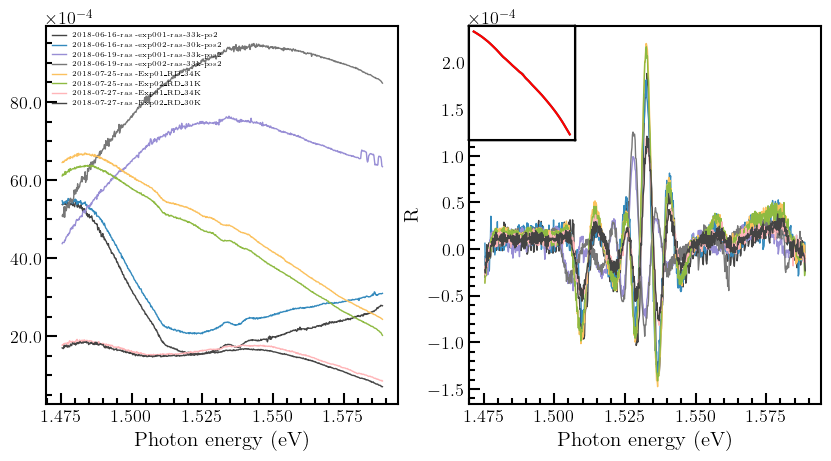

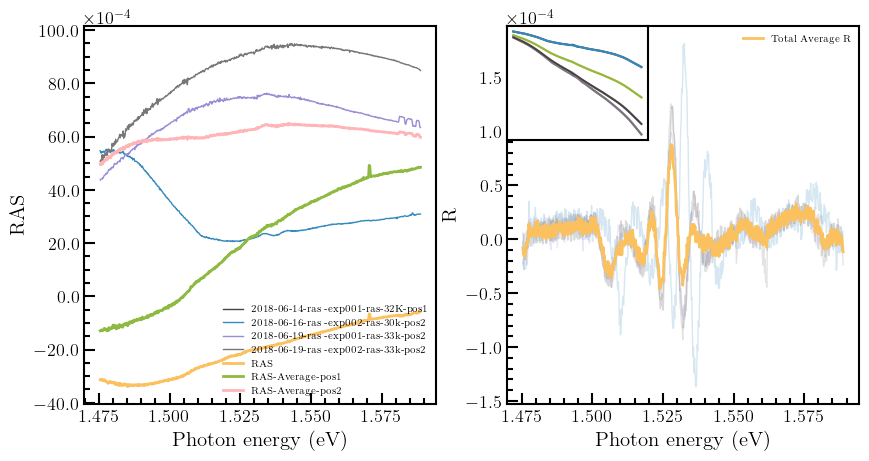

In [4]:
class parameters(object): pass
parameters=parameters()
parameters.samplename='m43171'
parameters.expi=1
parameters.expf=5
parameters.truncdata=0
parameters.nopts=51
parameters.polgrade=1

adata(parameters,m43171).plotall()
results=adata(parameters,m43171).plotras()

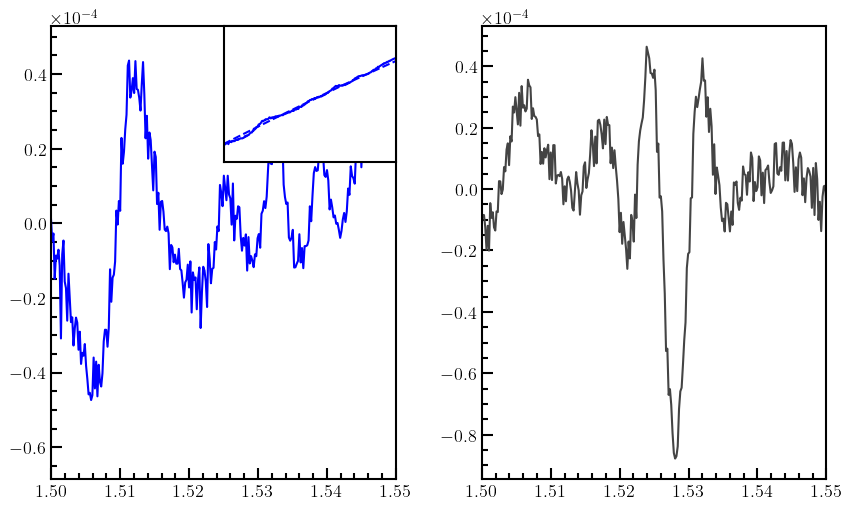

In [57]:
rasm43171=np.loadtxt("data/rest-m43171.dat",delimiter=',')
rbln=rbackline(rasm43171,301,1)
rasrblnm43171=rbln.dataout
bln = rbln.backline

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.subplots_adjust(wspace=0.25)
axins1 = inset_axes(ax[0], width="100%", height="100%",
                        bbox_to_anchor=(0.5,0.7,0.5,0.3),
                        bbox_transform=ax[0].transAxes,
                        borderpad=0,
                            )
axins1.set_xticks([])
axins1.set_yticks([])




ras = results.ras
rm43171 = results.ravp
rm43171[:,1] = -rm43171[:,1]

axins1.plot(1239.4/rasm43171[:,0],-rasm43171[:,1],'b')
axins1.plot(1239.4/rasm43171[:,0],-bln,'--b')
axins1.set_xlim([1.5,1.55])

#ax[0].plot(ras[:,0],ras[:,1])
ax[0].plot(1239.4/rasrblnm43171[:,0],-rasrblnm43171[:,1],'b')

# ax[0].plot(1239.4/rasm43171[:,0],-rasm43171[:,1],'b')
# ax[0].plot(1239.4/rasm43171[:,0],-bln,'--b')


ax[1].plot(rm43171[:,0],rm43171[:,1])
plt.setp(ax, xlim=(1.5,1.55))

for axe in ax:
    axe.yaxis.set_major_formatter(OOMFormatter(-4, "%1.1f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))
plt.show()

exprasm43171= np.zeros(rasrblnm43171.shape)
exprasm43171[:,0]=1239.4/rasrblnm43171[:,0]
exprasm43171[:,1]=-rasrblnm43171[:,1]
np.savetxt("data/ras-m43171.dat",exprasm43171,delimiter=',')
np.savetxt("data/r-m43171.dat",rm43171,delimiter=',')

# Sample: m43172

In [58]:
m43172 = experiments(1,'cry-sys-1','ras',paths[6])

|  No. Dir  | Name Dir                                       |  No. files  |
|-----------|------------------------------------------------|-------------|
|     0     | cry-sys-1/m43172/exp-2018-06/2018-06-29-ras    |      2      |
|     1     | cry-sys-1/m43172/exp-2018-07/2018-07-10-ras    |      2      |
|     2     | cry-sys-1/m43172/exp-2018-07/2018-07-14-ras    |      3      |
|     3     | cry-sys-1/m43172/exp-2018-07/2018-07-20-ras-pr |      4      |
|     4     | cry-sys-1/m43172/exp-2018-07/2018-07-23-ras-pr |      4      |


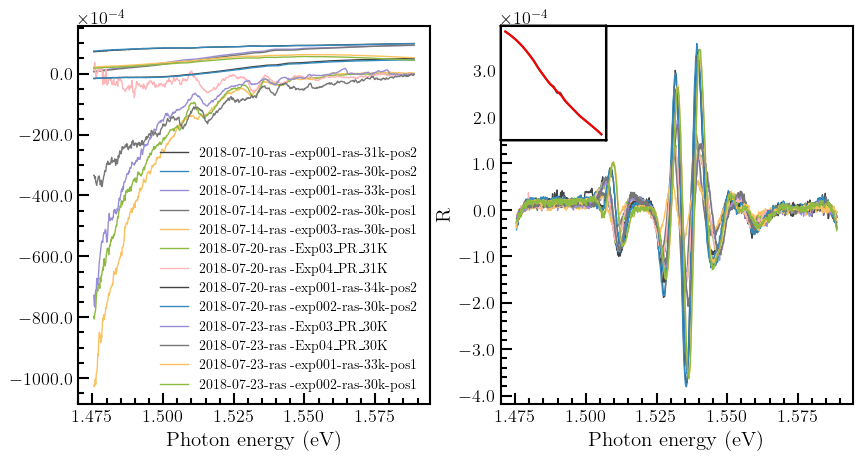

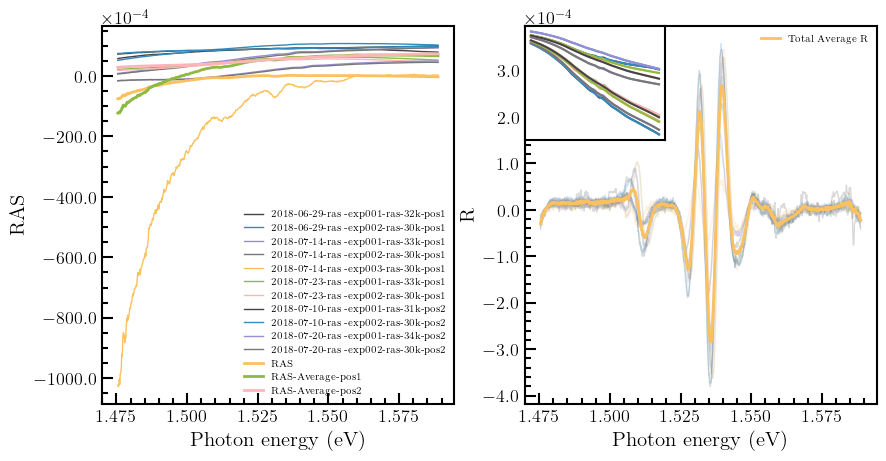

In [ ]:
class parameters(object): pass
parameters=parameters()
parameters.samplename='m43172'
parameters.expi=1
parameters.expf=5
parameters.truncdata=0
parameters.nopts=51
parameters.polgrade=1

adata(parameters,m43172).plotall()
results=adata(parameters,m43172).plotras()

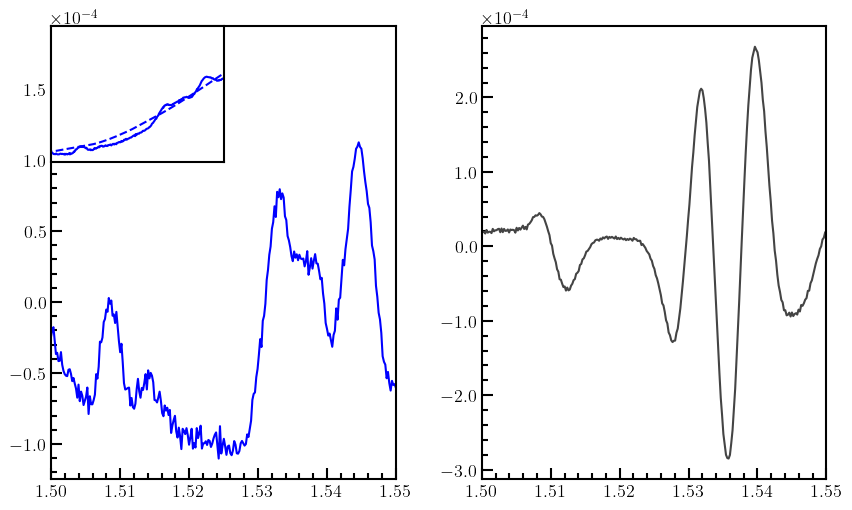

In [47]:
rasm43172=np.loadtxt("data/rest-m43172.dat",delimiter=',')
rbln=rbackline(rasm43172,201,1)
rasrblnm43172=rbln.dataout
bln = rbln.backline

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.subplots_adjust(wspace=0.25)
axins1 = inset_axes(ax[0], width="100%", height="100%",
                        bbox_to_anchor=(0.0,0.7,0.5,0.3),
                        bbox_transform=ax[0].transAxes,
                        borderpad=0,
                            )
axins1.set_xticks([])
axins1.set_yticks([])




ras = results.ras
rm43172 = results.ravp
rm43172[:,1] = -rm43172[:,1]
#axins1.plot(1239.4/rasm43172[:,0],-rasrblnm43172[:,1],'b')
axins1.plot(1239.4/rasm43172[:,0],-rasm43172[:,1],'b')
axins1.plot(1239.4/rasm43172[:,0],-bln,'--b')
axins1.set_xlim([1.5,1.55])

#ax[0].plot(ras[:,0],ras[:,1])
# ax[0].plot(1239.4/rasm43172[:,0],-rasm43172[:,1],'b')
# ax[0].plot(1239.4/rasm43172[:,0],-bln,'--b')
ax[0].plot(1239.4/rasm43172[:,0],-rasrblnm43172[:,1],'b')


ax[1].plot(rm43172 [:,0],rm43172[:,1])
plt.setp(ax, xlim=(1.5,1.55))

for axe in ax:
    axe.yaxis.set_major_formatter(OOMFormatter(-4, "%1.1f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))
plt.show()

exprasm43172= np.zeros(rasrblnm43172.shape)
exprasm43172[:,0]=1239.4/rasrblnm43172[:,0]
exprasm43172[:,1]=rasrblnm43172[:,1]
np.savetxt("data/ras-m43172.dat",exprasm43172,delimiter=',')
np.savetxt("data/r-m43172.dat",rm43172,delimiter=',')

# Sample: m43226

In [59]:
m43226 = experiments(1,'cry-sys-1','ras',paths[7])

|  No. Dir  | Name Dir                                       |  No. files  |
|-----------|------------------------------------------------|-------------|
|     0     | cry-sys-1/m43226/exp-2018-03/2018-03-06-ras    |      3      |
|     1     | cry-sys-1/m43226/exp-2018-07/2018-07-30-ras-pr |      6      |
|     2     | cry-sys-1/m43226/exp-2018-07/2018-07-31-ras-pr |      5      |


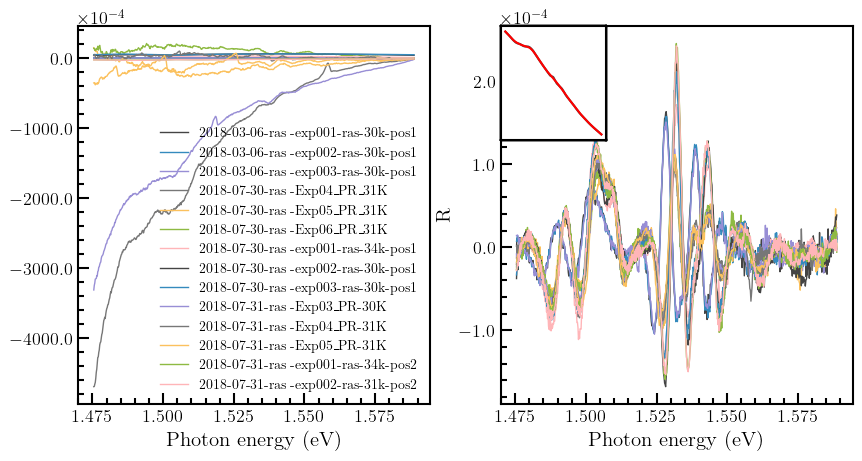

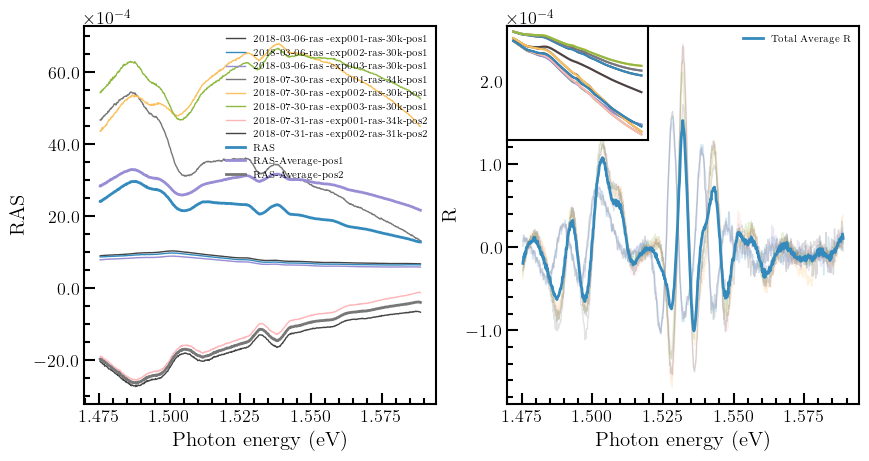

In [60]:
class parameters(object): pass
parameters=parameters()
parameters.samplename='m43226'
parameters.expi=0
parameters.expf=3
parameters.truncdata=0
parameters.nopts=51
parameters.polgrade=1

adata(parameters,m43226).plotall()
resultsm43226=adata(parameters,m43226).plotras()

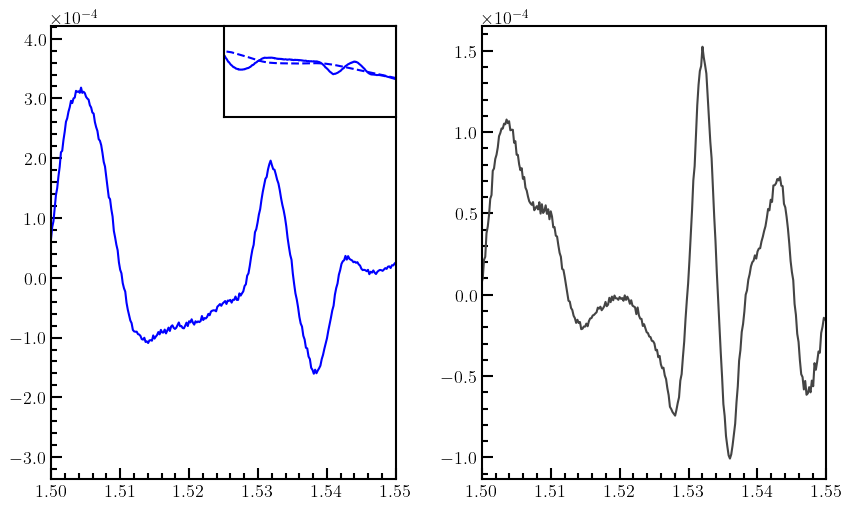

In [63]:
#rasm43226=np.loadtxt("data/rest-m43226.dat",delimiter=',')
rasm43226 = resultsm43226.ras

rbln=rbackline(rasm43226,301,2)
rasrblnm43226=rbln.dataout
bln=rbln.backline
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.subplots_adjust(wspace=0.25)
axins1 = inset_axes(ax[0], width="100%", height="100%",
                        bbox_to_anchor=(0.5,0.8,0.5,0.2),
                        bbox_transform=ax[0].transAxes,
                        borderpad=0,
                            )
axins1.set_xticks([])
axins1.set_yticks([])




rm43226 = resultsm43226.ravp
# axins1.plot(rasrblnm43226[:,0],-rasrblnm43226[:,1],'b')
axins1.plot(rasm43226[:,0],rasm43226[:,1],'b')
axins1.plot(rasm43226[:,0],bln,'--b')
axins1.set_xlim([1.5,1.55])
#ax[0].plot(ras[:,0],ras[:,1],'r')

# ax[0].plot(rasm43226[:,0],rasm43226[:,1],'b')
# ax[0].plot(rasm43226[:,0],bln,'--b')
ax[0].plot(rasrblnm43226[:,0],-rasrblnm43226[:,1],'b')

#ax[0].set_ylim([-0.002,0.003]) 

ax[1].plot(rm43226[:,0],rm43226[:,1])
plt.setp(ax, xlim=(1.5,1.55))
for axe in ax:
    axe.yaxis.set_major_formatter(OOMFormatter(-4, "%1.1f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))
plt.show()

# exprasm43226= np.zeros(rasrblnm43226.shape)
#exprasm43226[:,0]=rasrblnm43226[:,0]
rasrblnm43226[:,1]=-rasrblnm43226[:,1]
np.savetxt("data/ras-m43226.dat",rasrblnm43226,delimiter=',')
np.savetxt("data/r-m43226.dat",rm43226,delimiter=',')

In [64]:
def eqdata(sample):
    maxrows=0
    maxcols=0
    for i in range(len(sample)):
        for j in range(len(sample[i])):
            nrows=sample[i][j].shape[0]
            ncols=sample[i][j].shape[1]
            if nrows>maxrows:
                maxrows=nrows
            if ncols>maxcols:
                maxcols=ncols
    print(maxrows)
eqdata(m43171.data)

600


In [12]:
-1000e-4

-0.1

# Sample: m43140

In [3]:
m43140 = experiments(1,'cry-sys-1','ras',paths[3])

|  No. Dir  | Name Dir                                                      |  No. files  |
|-----------|---------------------------------------------------------------|-------------|
|     0     | cry-sys-1/m43140/exp-2018-09/2018-09-05-ras-pr                |      1      |
|     1     | cry-sys-1/m43140/exp-2018-09/2018-09-06-ras-pr                |      2      |
|     2     | cry-sys-1/m43140/exp-2018-09/2018-09-08-ras-pr                |      3      |
|     3     | cry-sys-1/m43140/exp-2018-09/2018-09-10-ras-pr                |      1      |
|     4     | cry-sys-1/m43140/exp-2018-09/2018-09-11-ras-pr                |      4      |
|     5     | cry-sys-1/m43140/exp-2018-09/2018-09-12-ras-pra               |      2      |
|     6     | cry-sys-1/m43140/exp-2018-11/2018-11-20-ras-pr                |      2      |
|     7     | cry-sys-1/m43140/exp-2018-11/2018-11-22-ras-pr                |      2      |
|     8     | cry-sys-1/m43140/exp-2019-03/2019-03-05-ras-ccd               |   

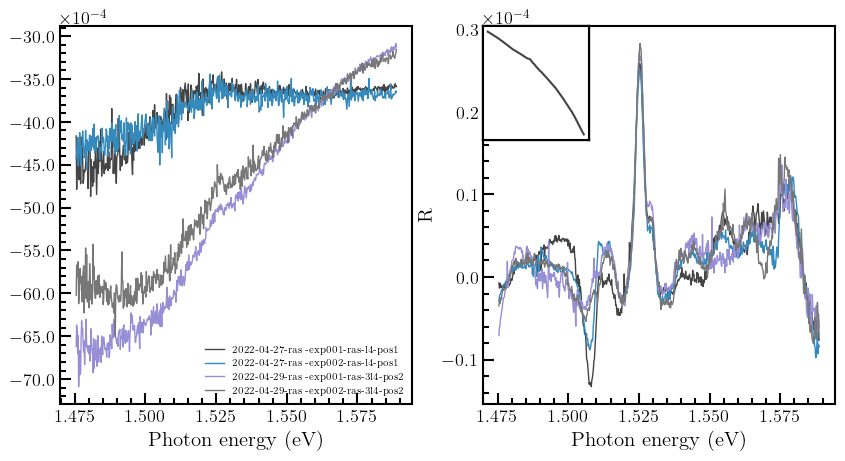

IndexError: list index out of range

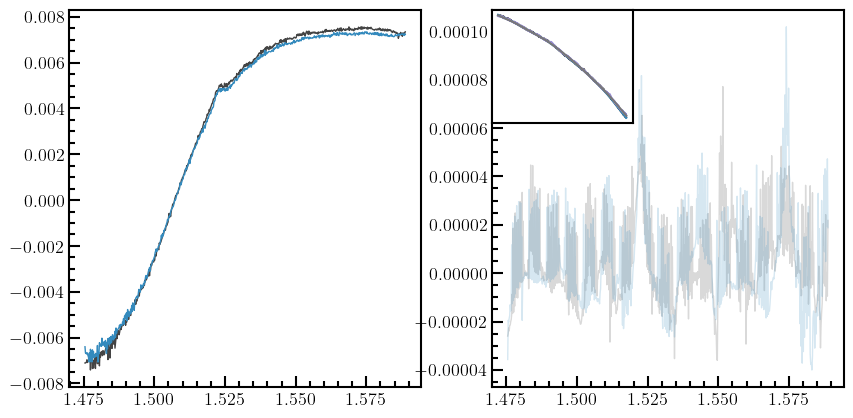

In [4]:
class parameters(object): pass
parameters=parameters()
parameters.samplename='m43140'
parameters.expi=15
parameters.expf=17
parameters.truncdata=0
parameters.nopts=91
parameters.polgrade=1
parameters.raspos1expi=15
parameters.raspos1expf=17
parameters.raspos2expi=16
parameters.raspos2expf=17

adata(parameters,m43140).plotall()
results=adata(parameters,m43140).plotras()

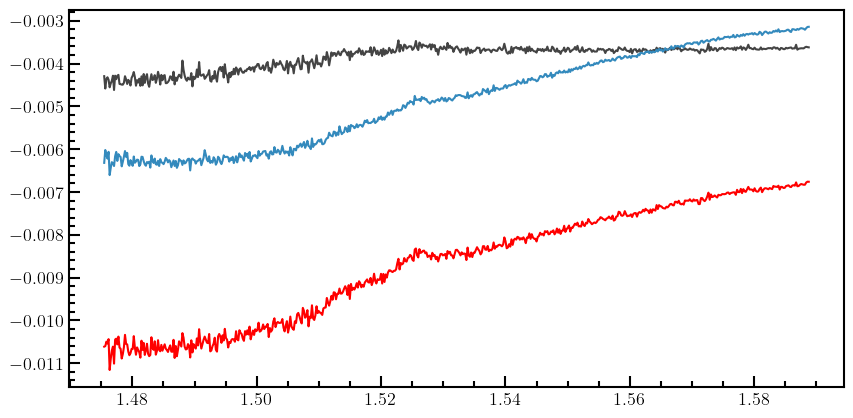

In [34]:
avrasl4=(m43140.data[15][0][:,1]+m43140.data[15][1][:,1])/2
avras3l4=(m43140.data[16][0][:,1]+m43140.data[16][1][:,1])/2
x = m43140.data[16][0][:,0]

plt.plot(x,avrasl4)
plt.plot(x,avras3l4)
plt.plot(x,avras3l4-avrasl4,'r')

plt.show()

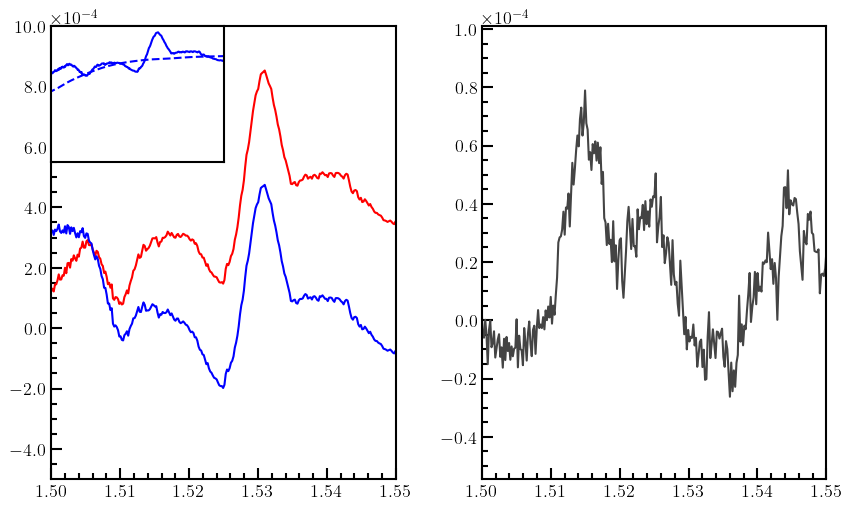

In [ ]:
rasm43140=np.loadtxt("data/ras-m43140-paper1.dat",delimiter=',')
rbln=rbackline(rasm43140,301,1)
rasrblnm43140=rbln.dataout
bln = rbln.backline

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.subplots_adjust(wspace=0.25)
axins1 = inset_axes(ax[0], width="100%", height="100%",
                        bbox_to_anchor=(0.0,0.7,0.5,0.3),
                        bbox_transform=ax[0].transAxes,
                        borderpad=0,
                            )
axins1.set_xticks([])
axins1.set_yticks([])




ras = results.ras
rm43140 = results.ravp
rm43140[:,1] = -rm43140[:,1]
#axins1.plot(1239.4/rasm43140[:,0],-rasrblnm43140[:,1],'b')
axins1.plot(rasm43140[:,0],rasm43140[:,1],'b')
axins1.plot(rasm43140[:,0],bln,'--b')
axins1.set_xlim([1.5,1.55])
ax[0].plot(rasm43140[:,0],rasm43140[:,1],'r')
ax[0].plot(rasm43140[:,0],rasrblnm43140[:,1],'b')
ax[0].set_ylim([-5e-4,10e-4]) 


ax[1].plot(rm43140 [:,0],rm43140[:,1])
plt.setp(ax, xlim=(1.5,1.55))

for axe in ax:
    axe.yaxis.set_major_formatter(OOMFormatter(-4, "%1.1f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-5,5))
plt.show()

exprasm43140= np.zeros(rasrblnm43140.shape)
exprasm43140[:,0]=rasrblnm43140[:,0]
exprasm43140[:,1]=rasrblnm43140[:,1]
np.savetxt("data/ras-m43140.dat",exprasm43140,delimiter=',')
np.savetxt("data/r-m43140.dat",rm43140,delimiter=',')

In [26]:
len(m43140.raspos2)


6

# Sample: m43141

In [49]:
m43141 = experiments(1,'cry-sys-1','ras',paths[4])

|  No. Dir  | Name Dir                                       |  No. files  |
|-----------|------------------------------------------------|-------------|
|     0     | cry-sys-1/m43141/exp-2018-09/2018-09-15-ras    |      2      |
|     1     | cry-sys-1/m43141/exp-2018-09/2018-09-20-ras-pr |      2      |
|     2     | cry-sys-1/m43141/exp-2018-09/2018-09-24-ras    |      4      |
|     3     | cry-sys-1/m43141/exp-2018-09/2018-09-25-ras-pr |      3      |
|     4     | cry-sys-1/m43141/exp-2018-09/2018-09-27-ras    |      3      |
|     5     | cry-sys-1/m43141/exp-2018-09/2018-09-28-ras    |      2      |
|     6     | cry-sys-1/m43141/exp-2018-10/2018-10-01-ras-pr |      3      |


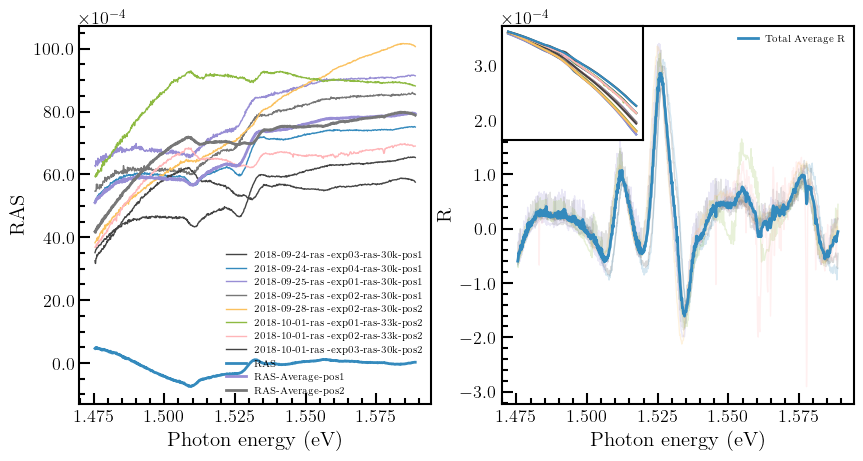

In [127]:
class parameters(object): pass
parameters=parameters()
parameters.samplename='m43141'
parameters.expi=4
parameters.expf=5
parameters.truncdata=0
parameters.nopts=101
parameters.polgrade=1
parameters.raspos1expi=5
parameters.raspos1expf=10
parameters.raspos2expi=5
parameters.raspos2expf=9

#adata(parameters,m43141).plotall()
results=adata(parameters,m43141).plotras()

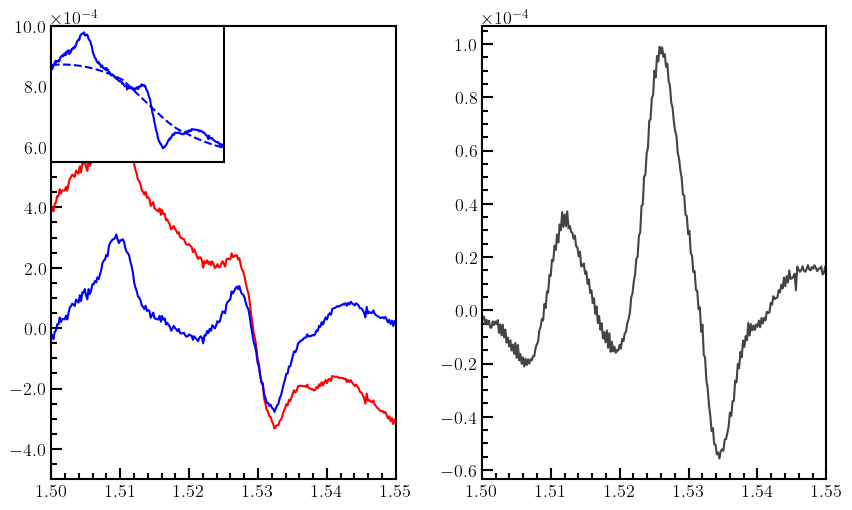

In [129]:
rasm43141=np.loadtxt("data/rest-m43141.dat",delimiter=',')
rasm43141[:,0]=1239.4/rasm43141[:,0]
rbln=rbackline(rasm43141,301,2)
rasrblnm43141=rbln.dataout
bln = rbln.backline

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.subplots_adjust(wspace=0.25)
axins1 = inset_axes(ax[0], width="100%", height="100%",
                        bbox_to_anchor=(0.0,0.7,0.5,0.3),
                        bbox_transform=ax[0].transAxes,
                        borderpad=0,
                            )
axins1.set_xticks([])
axins1.set_yticks([])




ras = results.ras
rm43141 = results.ravp
rm43141[:,1] = -(rm43141[:,1]/1.7)
#axins1.plot(1239.4/rasm43141[:,0],-rasrblnm43141[:,1],'b')
axins1.plot(rasm43141[:,0],-rasm43141[:,1],'b')
axins1.plot(rasm43141[:,0],-bln,'--b')
axins1.set_xlim([1.5,1.55])


ax[0].plot(rasm43141[:,0],-rasm43141[:,1],'r')
ax[0].plot(rasm43141[:,0],-rasrblnm43141[:,1],'b')
ax[0].set_ylim([-5e-4,10e-4]) 


ax[1].plot(rm43141 [:,0],rm43141[:,1])
plt.setp(ax, xlim=(1.5,1.55))

for axe in ax:
    axe.yaxis.set_major_formatter(OOMFormatter(-4, "%1.1f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-5,5))
plt.show()

exprasm43141= np.zeros(rasrblnm43141.shape)
exprasm43141[:,0]=rasrblnm43141[:,0]
exprasm43141[:,1]=rasrblnm43141[:,1]
np.savetxt("data/ras-m43141.dat",exprasm43141,delimiter=',')
np.savetxt("data/r-m43141.dat",rm43141,delimiter=',')

# Sample: m43521

In [5]:
m43521 = experiments(1,'cry-sys-1','ras',paths[8])

|  No. Dir  | Name Dir                                          |  No. files  |
|-----------|---------------------------------------------------|-------------|
|     0     | cry-sys-1/m43521/exp-2019-09/2019-09-25-ras-pr    |      2      |
|     1     | cry-sys-1/m43521/exp-2019-09/2019-09-26-ras-pr    |      4      |
|     2     | cry-sys-1/m43521/exp-2019-10/2019-10-12-ras       |      5      |
|     3     | cry-sys-1/m43521/exp-2019-10/2019-10-15-ras       |      5      |
|     4     | cry-sys-1/m43521/exp-2019-12/2019-12-17-ras       |      2      |
|     5     | cry-sys-1/m43521/exp-2019-12/2019-12-19-ras       |      4      |
|     6     | cry-sys-1/m43521/exp-2019-12/2019-12-20-ras       |      3      |
|     7     | cry-sys-1/m43521/exp-2019-12/2019-12-21-ras       |      4      |
|     8     | cry-sys-1/m43521/exp-2019-12/2019-12-23-ras       |      6      |
|     9     | cry-sys-1/m43521/exp-2019-12/2019-12-24-ras       |      4      |
|    10     | cry-sys-1/m43521/exp-2019-

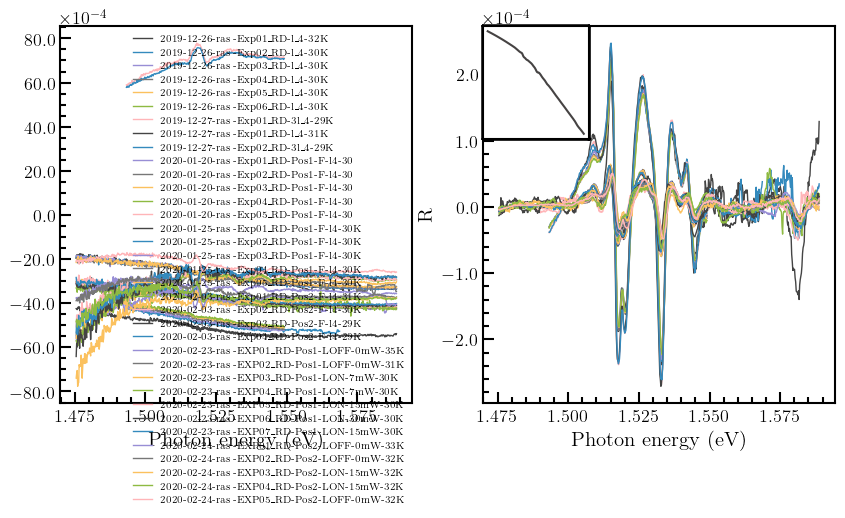

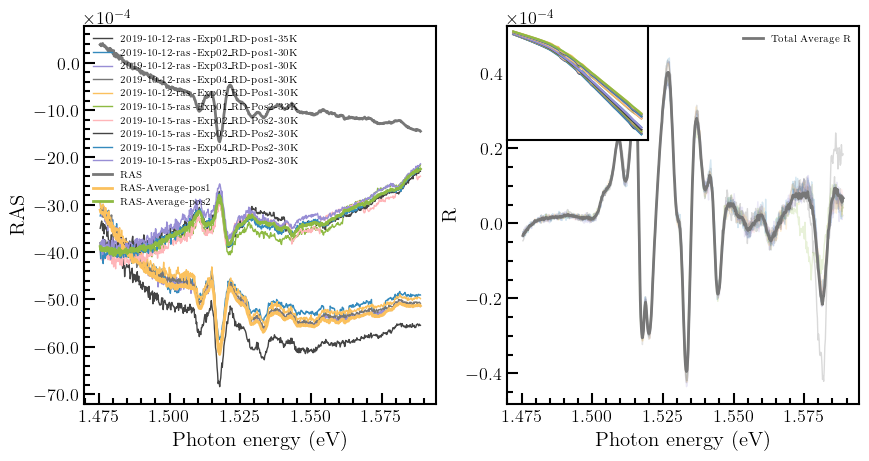

In [7]:
class parameters(object): pass
parameters=parameters()
parameters.samplename='m43141'
parameters.expi=10
parameters.expf=17
parameters.truncdata=0
parameters.nopts=101
parameters.polgrade=1
parameters.raspos1expi=2
parameters.raspos1expf=7
parameters.raspos2expi=4
parameters.raspos2expf=9

adata(parameters,m43521).plotall()
results=adata(parameters,m43521).plotras()

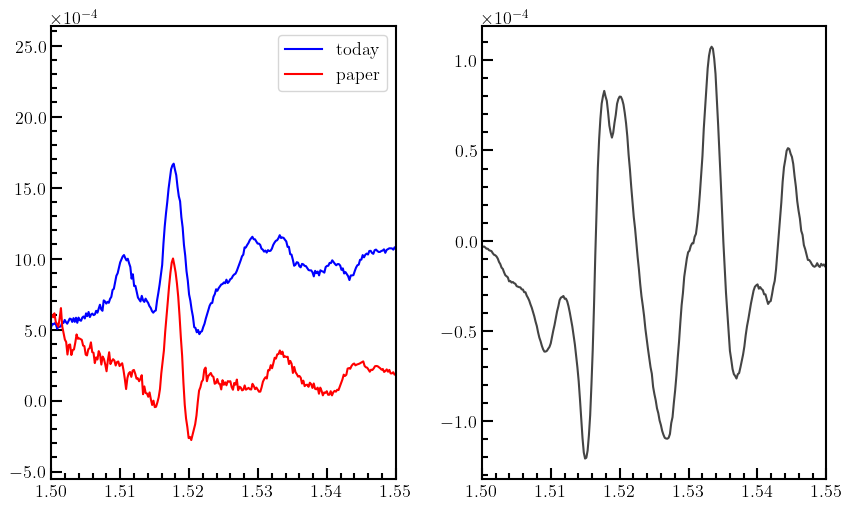

In [94]:
rasm43521=np.loadtxt("data/RAS-M4_3521-PAPER1.dat",delimiter=',')
#rasm43521[:,0]=1239.4/rasm43521[:,0]
rbln=rbackline(rasm43521,101,1)
rasrblnm43521=rbln.dataout
bln = rbln.backline

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.subplots_adjust(wspace=0.25)
# axins1 = inset_axes(ax[0], width="100%", height="100%",
#                         bbox_to_anchor=(0.0,0.7,0.5,0.3),
#                         bbox_transform=ax[0].transAxes,
#                         borderpad=0,
#                             )
# axins1.set_xticks([])
# axins1.set_yticks([])




ras = results.ras
rm43521 = results.ravp
rm43521[:,1] = rm43521[:,1]*1.7
#axins1.plot(1239.4/rasm43521[:,0],-rasrblnm43521[:,1],'b')
# axins1.plot(rasm43521[:,0],rasm43521[:,1],'b')
# axins1.plot(rasm43521[:,0],bln,'--b')

ax[0].plot(ras[:,0],-ras[:,1],'b',label='today')
ax[0].plot(rasm43521[:,0],-rasm43521[:,2]-30e-4,'r',label='paper')
#ax[0].plot(rasm43521[:,0],rasrblnm43521[:,1],'g')
#ax[0].set_ylim([-5e-4,10e-4]) 


ax[1].plot(rm43521 [:,0],rm43521[:,1])
plt.setp(ax, xlim=(1.5,1.55))


axins1.set_xlim([1.5,1.55])

for axe in ax:
    axe.yaxis.set_major_formatter(OOMFormatter(-4, "%1.1f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-5,5))
    
ax[0].legend()
plt.show()

exprasm43521= np.zeros(rasrblnm43521.shape)
exprasm43521[:,0]=rasrblnm43521[:,0]
exprasm43521[:,1]=rasrblnm43521[:,1]
np.savetxt("data/ras-m43521.dat",exprasm43521,delimiter=',')
np.savetxt("data/r-m43521.dat",rm43521,delimiter=',')

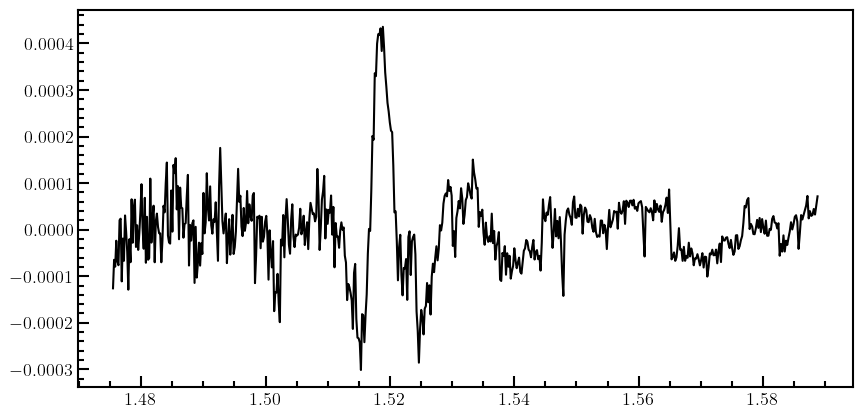

In [9]:
d1= m43521.data[6]
d2= m43521.data[7]
av1 = np.zeros(d1[0].shape)
av2 = np.zeros(d1[0].shape)

avc1=0
avc2=0
for i in range(len(d1)):
    #plt.plot(d1[i][:,0],d1[i][:,1])
    avc1+=d1[i][:,1]
    
for i in range(len(d2)):
    #plt.plot(d2[i][:,0],d2[i][:,1])
    avc2+=d2[i][:,1]

av1[:,0]=d1[0][:,0]
av1[:,1]=avc1/len(d1)
av2[:,0]=d1[0][:,0]
av2[:,1]=avc2/len(d2)

exp1=rbackline(av1,301,2)
exp2=rbackline(av2,301,2)
total= (exp2.dataout[:,1]-exp1.dataout[:,1])

# plt.plot(av1[:,0],av1[:,1],'r')
# plt.plot(av1[:,0],exp1.backline,'--r')


# plt.plot(av2[:,0],av2[:,1],'b')
# plt.plot(av1[:,0],exp2.backline,'--b')

#plt.plot(av1[:,0],exp1.dataout[:,1],'r')
#plt.plot(av1[:,0],exp2.dataout[:,1],'b')
plt.plot(av1[:,0],total,'k')



np.savetxt('data/ras-m43521-l4.dat',exp1.dataout,delimiter=',')
np.savetxt('data/ras-m43521-3l4.dat',exp2.dataout,delimiter=',')

# Sample: m43522

In [95]:
m43522 = experiments(1,'cry-sys-1','ras',paths[9])

|  No. Dir  | Name Dir                                          |  No. files  |
|-----------|---------------------------------------------------|-------------|
|     0     | cry-sys-1/m43522/exp-2019-10/2019-10-21-ras       |      5      |
|     1     | cry-sys-1/m43522/exp-2019-10/2019-10-22-ras       |      2      |
|     2     | cry-sys-1/m43522/exp-2019-10/2019-10-23-ras       |      5      |
|     3     | cry-sys-1/m43522/exp-2020-02/2020-02-26-ras-laser |      9      |
|     4     | cry-sys-1/m43522/exp-2020-02/2020-02-27-ras-laser |      6      |
|     5     | cry-sys-1/m43522/exp-2020-08/2020-08-20-ras       |      8      |


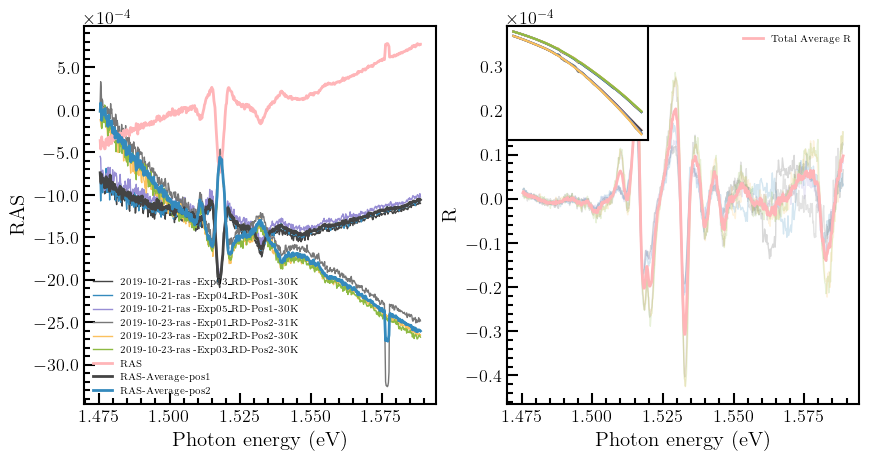

In [116]:
class parameters(object): pass
parameters=parameters()
parameters.samplename='m43141'
parameters.expi=0
parameters.expf=6
parameters.truncdata=0
parameters.nopts=201
parameters.polgrade=2
parameters.raspos1expi=2
parameters.raspos1expf=5
parameters.raspos2expi=2
parameters.raspos2expf=5
#adata(parameters,m43522).plotall()
results=adata(parameters,m43522).plotras()

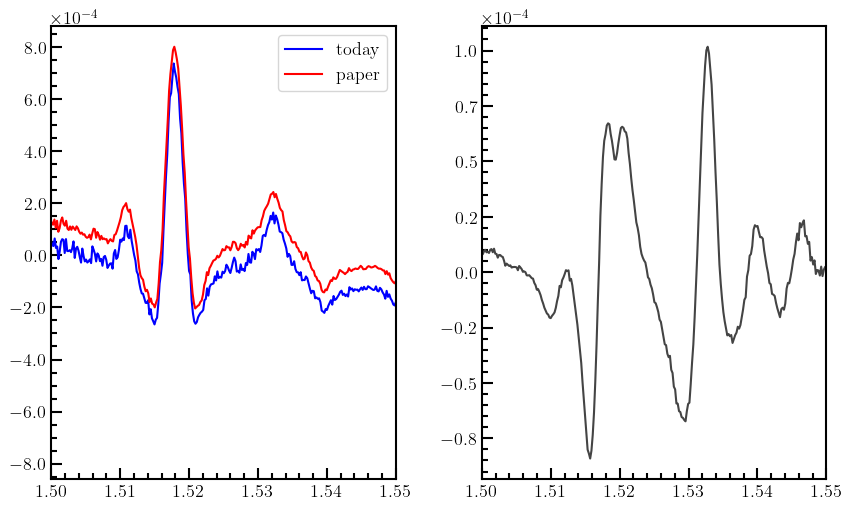

In [126]:
rasm43522=np.loadtxt("data/RAS-M4_3522-PAPER1.dat",delimiter=',')
#rasm43521[:,0]=1239.4/rasm43521[:,0]
rbln=rbackline(rasm43522,101,1)
rasrblnm43522=rbln.dataout
bln = rbln.backline

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.subplots_adjust(wspace=0.25)
# axins1 = inset_axes(ax[0], width="100%", height="100%",
#                         bbox_to_anchor=(0.0,0.7,0.5,0.3),
#                         bbox_transform=ax[0].transAxes,
#                         borderpad=0,
#                             )
# axins1.set_xticks([])
# axins1.set_yticks([])




ras = results.ras
rm43522 = results.ravp
rm43522[:,1] = -rm43522[:,1]*1.6
#axins1.plot(1239.4/rasm43521[:,0],-rasrblnm43521[:,1],'b')
# axins1.plot(rasm43521[:,0],rasm43521[:,1],'b')
# axins1.plot(rasm43521[:,0],bln,'--b')

ax[0].plot(ras[:,0],-ras[:,1]+0e-4,'b',label='today')
ax[0].plot(rasm43522[:,0],-rasm43522[:,1],'r',label='paper')
#ax[0].plot(rasm43521[:,0],rasrblnm43521[:,1],'g')
#ax[0].set_ylim([-5e-4,10e-4]) 


ax[1].plot(rm43522[:,0],rm43522[:,1])
plt.setp(ax, xlim=(1.5,1.55))


axins1.set_xlim([1.5,1.55])

for axe in ax:
    axe.yaxis.set_major_formatter(OOMFormatter(-4, "%1.1f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-5,5))
    
ax[0].legend()
plt.show()

exprasm43522= np.zeros(rasrblnm43522.shape)
exprasm43522[:,0]=rasrblnm43522[:,0]
exprasm43522[:,1]=rasrblnm43522[:,1]
np.savetxt("data/ras-m43522.dat",exprasm43522,delimiter=',')
np.savetxt("data/r-m43522.dat",rm43522,delimiter=',')

In [76]:
len(m43522.raspos2)

13

# Sample: m43523

In [107]:
m43523 = experiments(1,'cry-sys-1','ras',paths[10])

|  No. Dir  | Name Dir                                        |  No. files  |
|-----------|-------------------------------------------------|-------------|
|     0     | cry-sys-1/m43523/exp-2019-10/2019-10-03-ras-pr  |      4      |
|     1     | cry-sys-1/m43523/exp-2019-10/2019-10-07-ras-pr  |      3      |
|     2     | cry-sys-1/m43523/exp-2019-10/2019-10-09-ras-pr  |      4      |
|     3     | cry-sys-1/m43523/exp-2019-12/2019-12-31-ras     |      6      |
|     4     | cry-sys-1/m43523/exp-2020-01/2020-01-03-ras     |      4      |
|     5     | cry-sys-1/m43523/exp-2020-01/2020-01-07-ras     |      4      |
|     6     | cry-sys-1/m43523/exp-2020-01/2020-01-08-ras     |      6      |
|     7     | cry-sys-1/m43523/exp-2020-06/2020-06-16-ras-pra |     10      |
|     8     | cry-sys-1/m43523/exp-2020-06/2020-06-18-ras     |      5      |
|     9     | cry-sys-1/m43523/exp-2020-06/2020-06-19-ras     |      6      |


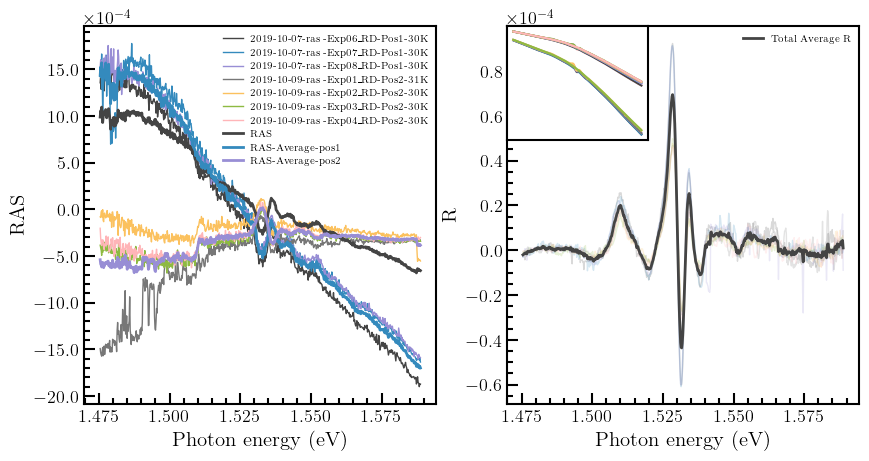

In [109]:
class parameters(object): pass
parameters=parameters()
parameters.samplename='m43141'
parameters.expi=1
parameters.expf=3
parameters.truncdata=1
parameters.nopts=101
parameters.polgrade=1
parameters.raspos1expi=4
parameters.raspos1expf=7
parameters.raspos2expi=0
parameters.raspos2expf=4

#adata(parameters,m43523).plotall()
results=adata(parameters,m43523).plotras()

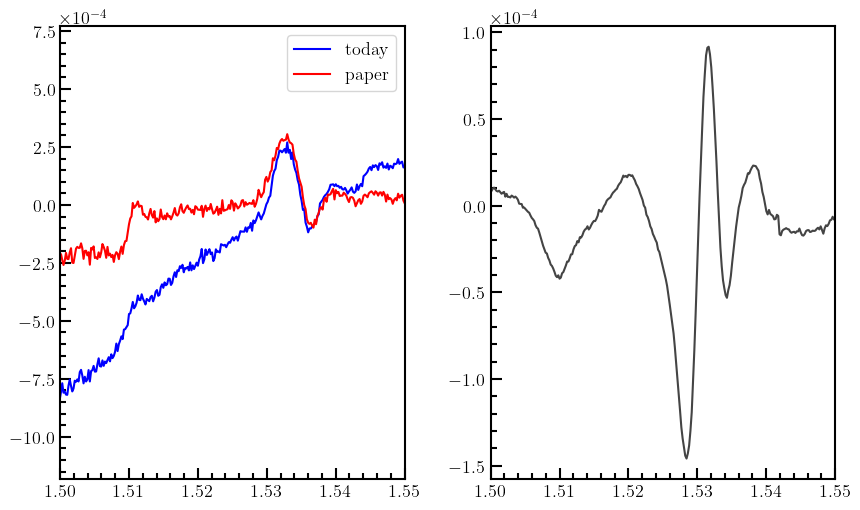

In [113]:
rasm43523=np.loadtxt("data/RAS-M4_3523-PAPER1.dat",delimiter=',')
#rasm43523[:,0]=1239.4/rasm43523[:,0]
rbln=rbackline(rasm43523,101,1)
rasrblnm43523=rbln.dataout
bln = rbln.backline

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.subplots_adjust(wspace=0.25)
# axins1 = inset_axes(ax[0], width="100%", height="100%",
#                         bbox_to_anchor=(0.0,0.7,0.5,0.3),
#                         bbox_transform=ax[0].transAxes,
#                         borderpad=0,
#                             )
# axins1.set_xticks([])
# axins1.set_yticks([])




ras = results.ras
rm43523 = results.ravp
rm43523[:,1] = rm43523[:,1]*1.2
#axins1.plot(1239.4/rasm43523[:,0],-rasrblnm43523[:,1],'b')
# axins1.plot(rasm43523[:,0],rasm43523[:,1],'b')
# axins1.plot(rasm43523[:,0],bln,'--b')

ax[0].plot(ras[:,0],-ras[:,1]+0e-4,'b',label='today')
ax[0].plot(rasm43523[:,0],rasm43523[:,1],'r',label='paper')
#ax[0].plot(rasm43523[:,0],rasrblnm43523[:,1],'g')
#ax[0].set_ylim([-5e-4,10e-4]) 


ax[1].plot(rm43523[:,0],rm43523[:,1])
plt.setp(ax, xlim=(1.5,1.55))


#axins1.set_xlim([1.5,1.55])

for axe in ax:
    axe.yaxis.set_major_formatter(OOMFormatter(-4, "%1.1f"))
    axe.ticklabel_format(axis='y', style='sci', scilimits=(-5,5))
    
ax[0].legend()
plt.show()

exprasm43523= np.zeros(rasrblnm43523.shape)
exprasm43523[:,0]=rasrblnm43523[:,0]
exprasm43523[:,1]=rasrblnm43523[:,1]
np.savetxt("data/ras-m43523.dat",exprasm43523,delimiter=',')
np.savetxt("data/r-m43523.dat",rm43523,delimiter=',')

# RAS n-type and p-type

In [5]:
rm4= experiments(1,'cry-sys-1','ras',paths[9])

|  No. Dir  | Name Dir                                          |  No. files  |
|-----------|---------------------------------------------------|-------------|
|     0     | cry-sys-1/m43522/exp-2019-10/2019-10-21-ras       |      5      |
|     1     | cry-sys-1/m43522/exp-2019-10/2019-10-22-ras       |      2      |
|     2     | cry-sys-1/m43522/exp-2019-10/2019-10-23-ras       |      5      |
|     3     | cry-sys-1/m43522/exp-2020-02/2020-02-26-ras-laser |      9      |
|     4     | cry-sys-1/m43522/exp-2020-02/2020-02-27-ras-laser |      6      |
|     5     | cry-sys-1/m43522/exp-2020-08/2020-08-20-ras       |      8      |


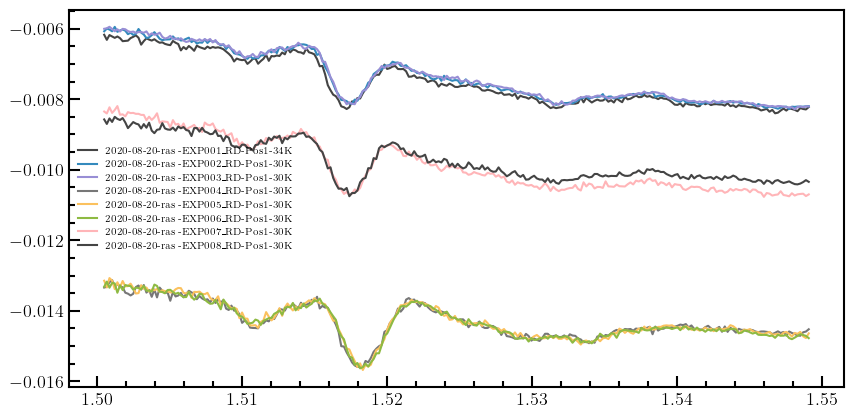

In [21]:
data= rm4.data[5]
files = rm4.filesname[5]
for i in range(len(data)):
    lbl=join_labels(files[i]) if i>0 else join_labels(files[i])
    plt.plot(data[i][:,0],data[i][:,1],label=lbl)
# results=adata(parameters,rm4).plotras()
plt.legend(frameon=False,fontsize=7)
plt.show()

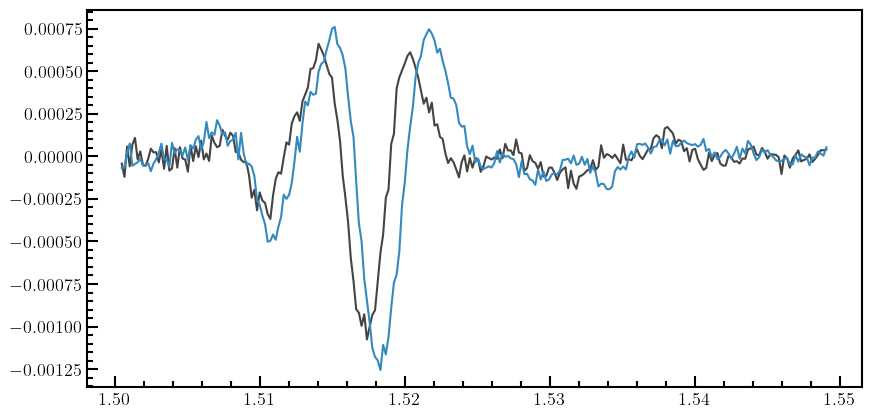

In [45]:
av22y=(data[6][:,1]+data[7][:,1])/2
av22x=data[1][:,0]
av22 = np.array([av22x,av22y]).T
av21y=(data[3][:,1]+data[4][:,1]+data[5][:,1])/3
av21x=data[1][:,0]
av21 = np.array([av21x,av21y]).T
m22=rbackline(av22,51,1)
m21=rbackline(av21,51,1)

#plt.plot(av22x,av22y)
plt.plot(m22.dataout[:,0],m22.dataout[:,1])
#plt.plot(m22.dataout[:,0],m22.backline)

#plt.plot(av21x,av21y)
plt.plot(m21.dataout[:,0],m21.dataout[:,1])
#plt.plot(m22.dataout[:,0],m22.backline)


In [46]:
np.savetxt('data/m43521-pos1.dat',m21.dataout,delimiter=',')
np.savetxt('data/m43522-pos1.dat',m22.dataout,delimiter=',')